# Randomly select splits to keep in the model

In [1]:
import torch
from sandbox import SimpleModel, toy_data, experiment_series, eval_series
from pathlib import Path

In [2]:
model_params = (1, 1, 8, 2, 2)

eps = 1e-4
num_kept_neurons = 2
lr=0.005
runs=10

#0: loss: 0.021412881091237068 - size: 209
#1: loss: 0.03406749665737152 - size: 209
#2: loss: 0.03249824419617653 - size: 209
#3: loss: 0.035882800817489624 - size: 209
#4: loss: 0.03957255929708481 - size: 209
#5: loss: 0.03018278442323208 - size: 209
#6: loss: 0.02459368295967579 - size: 209
#7: loss: 0.0323994942009449 - size: 209
#8: loss: 0.04929880052804947 - size: 209
#9: loss: 0.028200678527355194 - size: 209


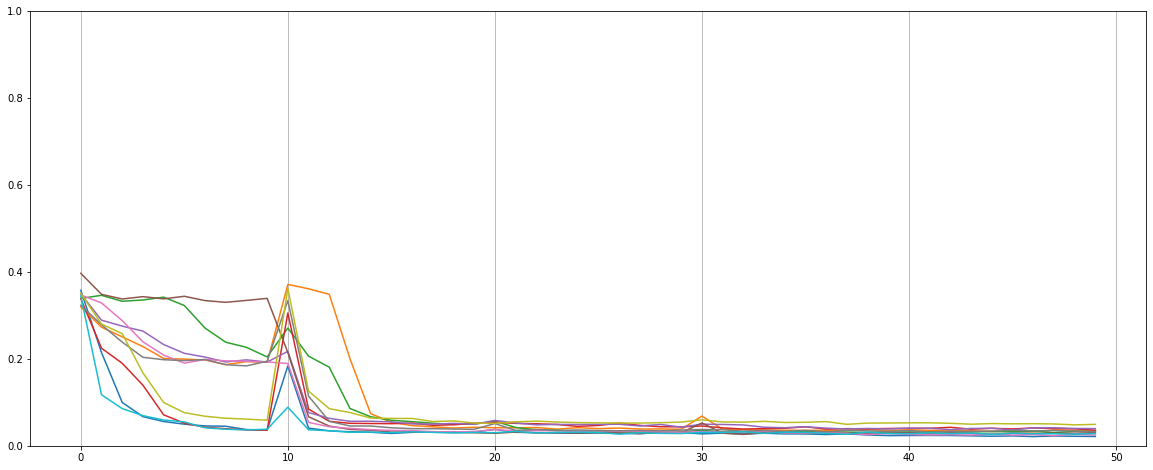

In [3]:
criterion = torch.nn.MSELoss()

def grow(model):
    new_neurons = model.grow(num_novel=4, eps=eps)
    
    model.tune_direction()
    model.tune_new_neurons()
            

    selected = [torch.randperm(n)[:num_kept_neurons] for n in new_neurons]

    model.degrow(*selected)

series = experiment_series(model_params, runs=runs, grow=grow, lr=lr)

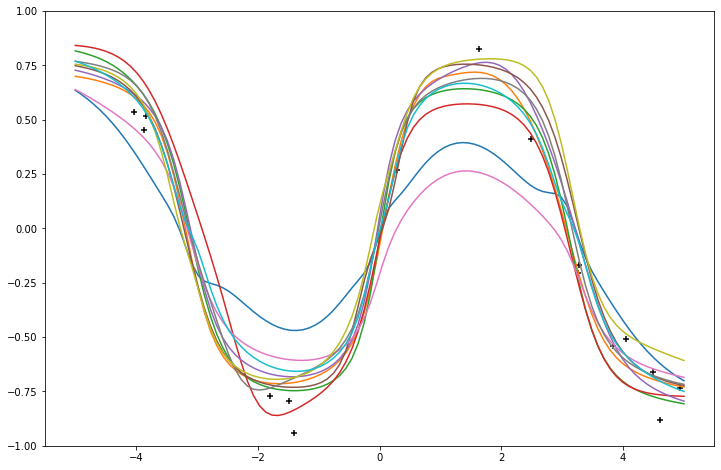

In [4]:
eval_series(series)

In [5]:
d = Path("results")
d.mkdir(parents=True, exist_ok=True)

torch.save(series, d / 'random_growth_tuned.pt')